In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def modela(init, itr, scale):
    '''
    Uniform timesteps
    '''
    hist_val = [init]
    for each in range(0, itr):
        hist_val.append(hist_val[each]*scale)
    return np.array(hist_val)

In [3]:
run1 = modela(init=1, itr=30, scale=1.1)

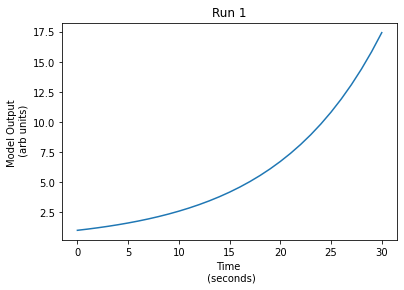

In [4]:
plt.plot(run1)
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 1')
plt.show()

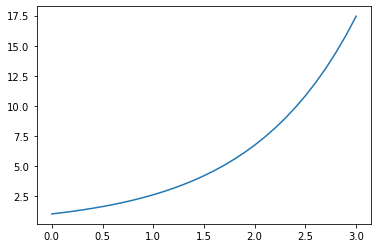

In [5]:
a = 1.1
def initialize():
    global x, result, t, timesteps
    x=1
    result = [x]
    t=0
    timesteps = [t]
    
def observe():
    global x, result, t, timesteps
    result.append(x)
    timesteps.append(t)

def update():
    global x, result, t, timesteps
    x = a * x
    t += 0.1
    
initialize()
while t < 3.:
    update()
    observe()
plt.plot(timesteps, result)
plt.show()

In [6]:
hist_time = [0]
hist_val = [1]
time_init = 0
scale = 1.1
while time_init < 3:
    hist_val.append(scale * hist_val[-1])
    hist_time.append(time_init + 0.1)
    time_init += 0.1

In [7]:
def modelb(val_init, time_init, scale, nrange, step):
    hist_val = [val_init]
    hist_time = [time_init]
    
    while time_init < nrange:
        hist_val.append(scale * hist_val[-1])
        hist_time.append(time_init + 0.1)
        time_init += step
    return_dict = {}
    return_dict['time'] = hist_time 
    return_dict['values'] = hist_val
    return return_dict

In [8]:
run2 = modelb(val_init=1, time_init=0, scale=1.1, nrange=3, step=0.1)

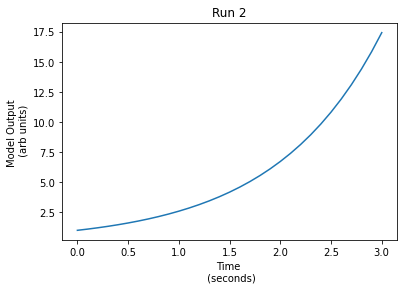

In [9]:
plt.plot(run2['time'], run2['values'])
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 2')
plt.show()

In [10]:
def modelc(init, itr, scale, constant):
    hist_val = [init]
    for each in range(0, itr):
        hist_val.append(hist_val[each]*scale + constant)
    return np.array(hist_val)

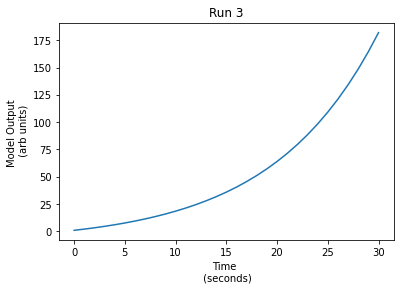

In [11]:
run3 = modelc(init=1, itr=30, scale=1.1, constant=1)
plt.plot(run3)
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 3')
plt.show()

In [12]:
def modeld(xinit, yinit, itr, ycoef, xcoef):
    xresult = [xinit]
    yresult = [yinit]
    
    for _ in range(0, itr):
        xi = xcoef * xresult[-1] + yresult[-1] 
        yi = ycoef * xresult[-1] + yresult[-1]
        
        xresult.append(xi)
        yresult.append(yi)
        
    result = {}
    result['xresult'] = xresult
    result['yresult'] = yresult
    
    return result

In [13]:
run4 = modeld(xinit=1, yinit=1, itr=30, ycoef=-0.5, xcoef=0.5)

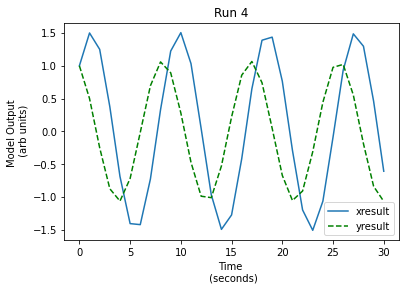

In [14]:
plt.plot(run4['xresult'], label='xresult')
plt.plot(run4['yresult'], 'g--', label='yresult')
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 4')
plt.legend()
plt.show()

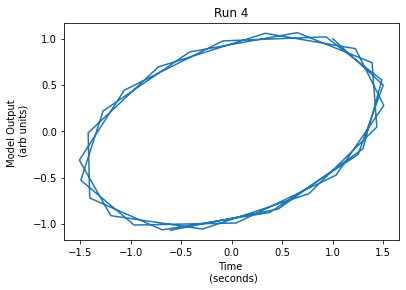

In [15]:
plt.plot(run4['xresult'], run4['yresult'])
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 4')
plt.show()

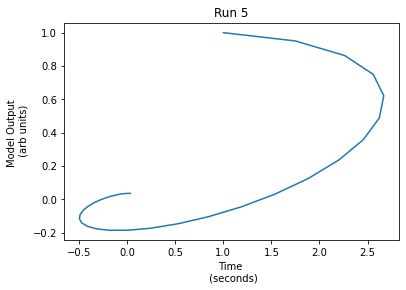

In [16]:
run5 = modeld(xinit=1, yinit=1, itr=30, ycoef=-0.05, xcoef=0.75)
plt.plot(run5['xresult'], run5['yresult'])
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 5')
plt.show()

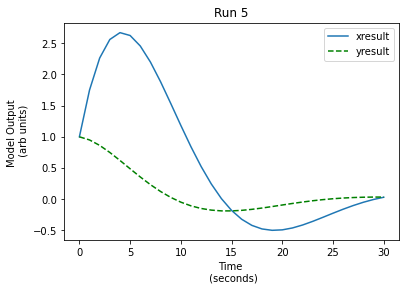

In [17]:
plt.plot(run5['xresult'], label='xresult')
plt.plot(run5['yresult'], 'g--', label='yresult')
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 5')
plt.legend()
plt.show()

In [18]:
def modele(xinit, yinit, itr):
    xresult = [xinit]
    yresult = [yinit]
    
    for _ in range(0, itr):
        xi = xresult[-1] + yresult[-1] 
        yi = xresult[-1]
        
        xresult.append(xi)
        yresult.append(yi)
        
    result = {}
    result['xresult'] = xresult
    result['yresult'] = yresult
    
    return result

In [19]:
run6 = modele(xinit=1, yinit=1, itr=30)

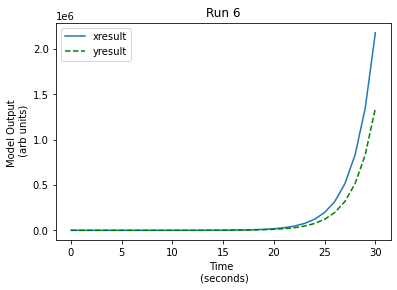

In [20]:
plt.plot(run6['xresult'], label='xresult')
plt.plot(run6['yresult'], 'g--', label='yresult')
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 6')
plt.legend()
plt.show()

In [21]:
def modelf(xinit, alpha, kconstant, itr):
    '''
    Range of `xinit`: 0 < xinit < kconstant
    '''
    xresults = [xinit]
    
    for _ in range(0, itr):
        coef = (alpha - 1) / kconstant
        xi = ((-1 * coef * xresults[-1]) + alpha) * xresults[-1]
        xresults.append(xi)
        
    results = {}
    results['xresult'] = xresults
    
    return results

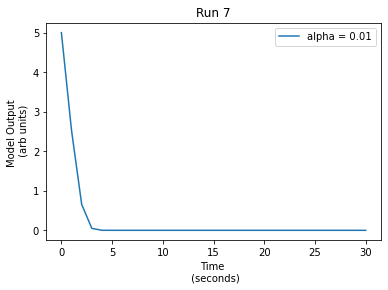

In [22]:
run7 = modelf(xinit=5, alpha=0.01, kconstant=10, itr=30)
# test for alpha < 1
plt.plot(run7['xresult'], label='alpha = 0.01')
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 7')
plt.legend()
plt.show()

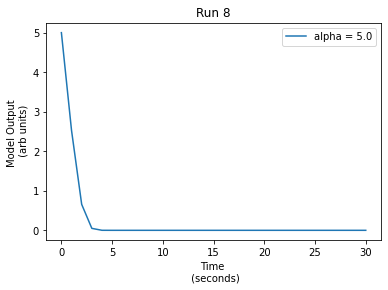

In [23]:
run8 = modelf(xinit=5, alpha=5.0, kconstant=10, itr=30)
# test for alpha > 1
plt.plot(run7['xresult'], label='alpha = 5.0')
plt.xlabel('Time \n (seconds)')
plt.ylabel('Model Output \n (arb units)')
plt.title('Run 8')
plt.legend()
plt.show()